In [14]:
import pandas as pd

# Load data
file_path = "/home/surendran/rag_local/data/breast-cancer-wisconsin-data_perturbed.csv"
df = pd.read_csv(file_path)

# Basic snapshot
print(df.shape)
print(df.head())


(420, 32)
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0   8510426         B       13.540         14.36           87.46      566.3   
1   8510653         B       13.080         15.71           85.63      520.0   
2   8510824         B        9.504         12.44           60.34      273.9   
3    854941         B       13.030         18.42           82.61      523.8   
4  85713702         B        8.196         16.84           51.71      201.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.09779           0.08129         0.06664             0.047810   
1          0.10750           0.12700         0.04568             0.031100   
2          0.10240           0.06492         0.02956             0.020760   
3          0.08983           0.03766         0.02562             0.029230   
4          0.08600           0.05943         0.01588             0.005917   

   ...  radius_worst  texture_worst  perimeter_worst

In [15]:
# Trying out Logistic Classifier -  for Baseline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Features and target
X = df.iloc[:, 2:32]
y = df.iloc[:, 1].map({"M": 1, "B": 0})

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Pipeline: scaling + linear classifier
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=500))
])

# Fit
pipe.fit(X_train, y_train)

# Quick check
print("Train accuracy:", pipe.score(X_train, y_train))
print("Test accuracy:", pipe.score(X_test, y_test))


Train accuracy: 1.0
Test accuracy: 0.9880952380952381


In [16]:
from sklearn.metrics import confusion_matrix, classification_report

# Predictions
y_pred_lr = pipe.predict(X_test)   # assuming earlier LogisticRegression pipeline

# Confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix (Logistic Regression):")
print(cm_lr)

# Optional readable breakdown
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_lr, target_names=["Benign", "Malignant"]))

Confusion Matrix (Logistic Regression):
[[71  0]
 [ 1 12]]

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

      Benign       0.99      1.00      0.99        71
   Malignant       1.00      0.92      0.96        13

    accuracy                           0.99        84
   macro avg       0.99      0.96      0.98        84
weighted avg       0.99      0.99      0.99        84



In [17]:
# Trying out Linear SVC - for Baseline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

# Features and target
X = df.iloc[:, 2:32]
y = df.iloc[:, 1].map({"M": 1, "B": 0})

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Pipeline: scaling + linear SVM
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="linear"))
])

# Fit
pipe.fit(X_train, y_train)

# Accuracy check
print("Train accuracy:", pipe.score(X_train, y_train))
print("Test accuracy:", pipe.score(X_test, y_test))

Train accuracy: 1.0
Test accuracy: 0.9880952380952381


In [18]:
from sklearn.metrics import confusion_matrix, classification_report

# Predictions
y_pred_svm = pipe.predict(X_test)   # assuming SVM pipeline now assigned to pipe

# Confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix (Linear SVM):")
print(cm_svm)

# Optional readable breakdown
print("\nClassification Report (Linear SVM):")
print(classification_report(y_test, y_pred_svm, target_names=["Benign", "Malignant"]))

Confusion Matrix (Linear SVM):
[[71  0]
 [ 1 12]]

Classification Report (Linear SVM):
              precision    recall  f1-score   support

      Benign       0.99      1.00      0.99        71
   Malignant       1.00      0.92      0.96        13

    accuracy                           0.99        84
   macro avg       0.99      0.96      0.98        84
weighted avg       0.99      0.99      0.99        84



In [20]:
## Review numbers on variability  - Explained variance & cumulative variance

# Basic Imports & Dataset Download


import pandas as pd

# Load data
file_path = "/home/surendran/rag_local/data/breast-cancer-wisconsin-data_perturbed.csv"
df = pd.read_csv(file_path)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Features and target
X = df.iloc[:, 2:32]
y = df.iloc[:, 1].map({"M": 1, "B": 0})

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# PCA (full spectrum first)
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca  = pca.transform(X_test_scaled)

# explained variance
explained_variance = pca.explained_variance_ratio_
explained_variance

array([4.20232311e-01, 1.96944996e-01, 9.22477763e-02, 7.06639757e-02,
       6.29958691e-02, 4.24917040e-02, 2.38229009e-02, 1.66129460e-02,
       1.47011411e-02, 1.22316689e-02, 1.04607262e-02, 9.41480468e-03,
       7.25757857e-03, 5.30233496e-03, 2.92441219e-03, 2.59572906e-03,
       2.16377164e-03, 1.41548397e-03, 1.12856755e-03, 9.84969889e-04,
       8.10868045e-04, 6.68742108e-04, 6.02179133e-04, 5.01629862e-04,
       3.72190402e-04, 2.17536287e-04, 1.76334736e-04, 4.05642240e-05,
       1.36920946e-05, 2.59569265e-06])

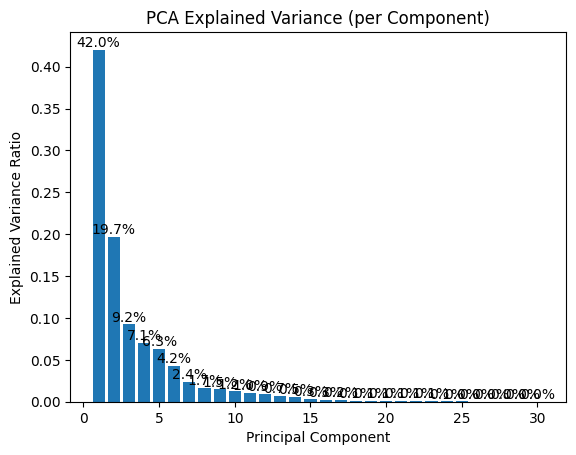

In [21]:
# PCA chart

plt.figure()
bars = plt.bar(
    range(1, len(explained_variance) + 1),
    explained_variance
)

plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("PCA Explained Variance (per Component)")

# annotate percentages
for i, v in enumerate(explained_variance):
    plt.text(i + 1, v, f"{v*100:.1f}%", ha='center', va='bottom')

plt.show()

PCA components: 4 | Test Accuracy: 0.9643
PCA components: 6 | Test Accuracy: 0.9881
PCA components: 8 | Test Accuracy: 0.9881
PCA components: 10 | Test Accuracy: 0.9881
PCA components: 12 | Test Accuracy: 0.9881
PCA components: 16 | Test Accuracy: 0.9881


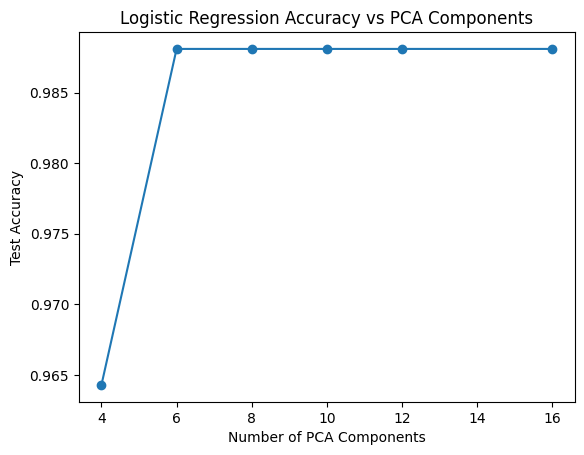

In [22]:
# Review of various pc for optimization

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

pca_components = [4, 6, 8, 10, 12, 16]
accuracies = []

for n in pca_components:
    pca = PCA(n_components=n)
    
    X_train_pca_n = pca.fit_transform(X_train_scaled)
    X_test_pca_n  = pca.transform(X_test_scaled)
    
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_pca_n, y_train)
    
    y_pred = model.predict(X_test_pca_n)
    acc = accuracy_score(y_test, y_pred)
    
    accuracies.append(acc)
    
    print(f"PCA components: {n} | Test Accuracy: {acc:.4f}")
import matplotlib.pyplot as plt

plt.figure()
plt.plot(pca_components, accuracies, marker='o')
plt.xlabel("Number of PCA Components")
plt.ylabel("Test Accuracy")
plt.title("Logistic Regression Accuracy vs PCA Components")
plt.show()


[[71  0]
 [ 1 12]]


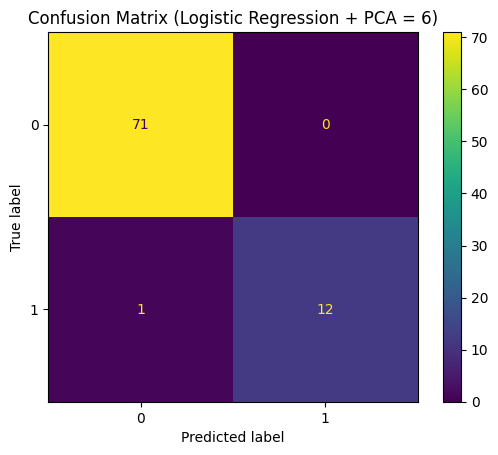

In [23]:
#Checking the models with optimized principle components (6)

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# PCA with 6 components
pca = PCA(n_components=6)
X_train_pca_6 = pca.fit_transform(X_train_scaled)
X_test_pca_6  = pca.transform(X_test_scaled)

# Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca_6, y_train)

# Predictions
y_pred_6 = model.predict(X_test_pca_6)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_6)
print(cm)

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix (Logistic Regression + PCA = 6)")
plt.show()


[[71  0]
 [ 1 12]]


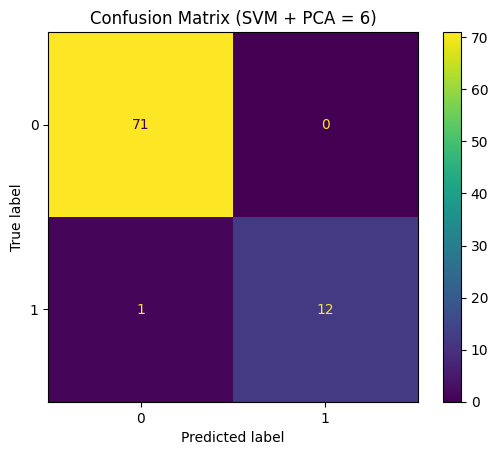

In [25]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# PCA with 6 components
pca = PCA(n_components=6)
X_train_pca_6 = pca.fit_transform(X_train_scaled)
X_test_pca_6  = pca.transform(X_test_scaled)

# SVM (linear, to match earlier comparison)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_pca_6, y_train)

# Predictions
y_pred_svm_6 = svm_model.predict(X_test_pca_6)

# Confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm_6)
print(cm_svm)

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp.plot()
plt.title("Confusion Matrix (SVM + PCA = 6)")
plt.show()


In [26]:
## Pre-Modeling steps - for RBF and Polnomial kernels without WITHOUT PCAs

# features and labels
X = df.drop(columns=['id', 'diagnosis'])
y = df['diagnosis'].map({'M': 1, 'B': 0})

# train–test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# scale (IMPORTANT for kernels)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [27]:
# calculating Accuracy and confusion matrix for RBF (without PCA)

rbf_svc = SVC(kernel='rbf', gamma='scale', C=1.0)
rbf_svc.fit(X_train_scaled, y_train)

y_pred_rbf = rbf_svc.predict(X_test_scaled)

print("RBF SVC Accuracy (no PCA):", accuracy_score(y_test, y_pred_rbf))
print("RBF Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))


RBF SVC Accuracy (no PCA): 0.9880952380952381
RBF Confusion Matrix:
 [[71  0]
 [ 1 12]]


In [28]:
poly_svc = SVC(kernel='poly', degree=3, gamma='scale', C=1.0)
poly_svc.fit(X_train_scaled, y_train)

y_pred_poly = poly_svc.predict(X_test_scaled)

print("Polynomial SVC Accuracy (no PCA):", accuracy_score(y_test, y_pred_poly))
print("Polynomial Confusion Matrix:\n", confusion_matrix(y_test, y_pred_poly))

Polynomial SVC Accuracy (no PCA): 0.9880952380952381
Polynomial Confusion Matrix:
 [[71  0]
 [ 1 12]]


In [29]:
#  # Pre-Modeling steps (8 pcas)

# features and labels
X = df.drop(columns=['id', 'diagnosis'])
y = df['diagnosis'].map({'M': 1, 'B': 0})

# split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# PCA with 8 components
pca = PCA(n_components=8)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca  = pca.transform(X_test_scaled)

In [30]:
# RBF Kernel SVC

rbf_svc = SVC(kernel='rbf', gamma='scale', C=1.0)
rbf_svc.fit(X_train_pca, y_train)

y_pred_rbf = rbf_svc.predict(X_test_pca)

print("RBF SVC Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("RBF Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))


RBF SVC Accuracy: 0.9880952380952381
RBF Confusion Matrix:
 [[71  0]
 [ 1 12]]


In [31]:
poly_svc = SVC(kernel='poly', degree=3, gamma='scale', C=1.0)
poly_svc.fit(X_train_pca, y_train)

y_pred_poly = poly_svc.predict(X_test_pca)

print("Polynomial SVC Accuracy:", accuracy_score(y_test, y_pred_poly))
print("Polynomial Confusion Matrix:\n", confusion_matrix(y_test, y_pred_poly))


Polynomial SVC Accuracy: 0.9761904761904762
Polynomial Confusion Matrix:
 [[71  0]
 [ 2 11]]


In [32]:
#  # Pre-Modeling steps (2 pcas) - for better visualization 

# features and labels
X = df.drop(columns=['id', 'diagnosis'])
y = df['diagnosis'].map({'M': 1, 'B': 0})

# split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# PCA = 2
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca  = pca.transform(X_test_scaled)

In [33]:
# Helper: decision-boundary plot

def plot_boundary(model, X, y, title):
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.2)
    plt.scatter(X[:,0], X[:,1], c=y, s=15)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title(title)

In [34]:
# 1️⃣ RBF Kernel SVC (PCA = 2)

rbf_svc = SVC(kernel='rbf', gamma='scale', C=1.0)
rbf_svc.fit(X_train_pca, y_train)

y_pred_rbf = rbf_svc.predict(X_test_pca)

print("RBF Accuracy (PCA=2):", accuracy_score(y_test, y_pred_rbf))
print("RBF Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))

RBF Accuracy (PCA=2): 0.9761904761904762
RBF Confusion Matrix:
 [[71  0]
 [ 2 11]]


In [41]:
# 2️⃣ Polynomial Kernel SVC (degree = 3, PCA = 2)

poly_svc = SVC(kernel='poly', degree=3, gamma='scale', C=1.0)
poly_svc.fit(X_train_pca, y_train)

y_pred_poly = poly_svc.predict(X_test_pca)

print("Polynomial Accuracy (PCA=2):", accuracy_score(y_test, y_pred_poly))
print("Polynomial Confusion Matrix:\n", confusion_matrix(y_test, y_pred_poly))


Polynomial Accuracy (PCA=2): 0.9761904761904762
Polynomial Confusion Matrix:
 [[71  0]
 [ 2 11]]


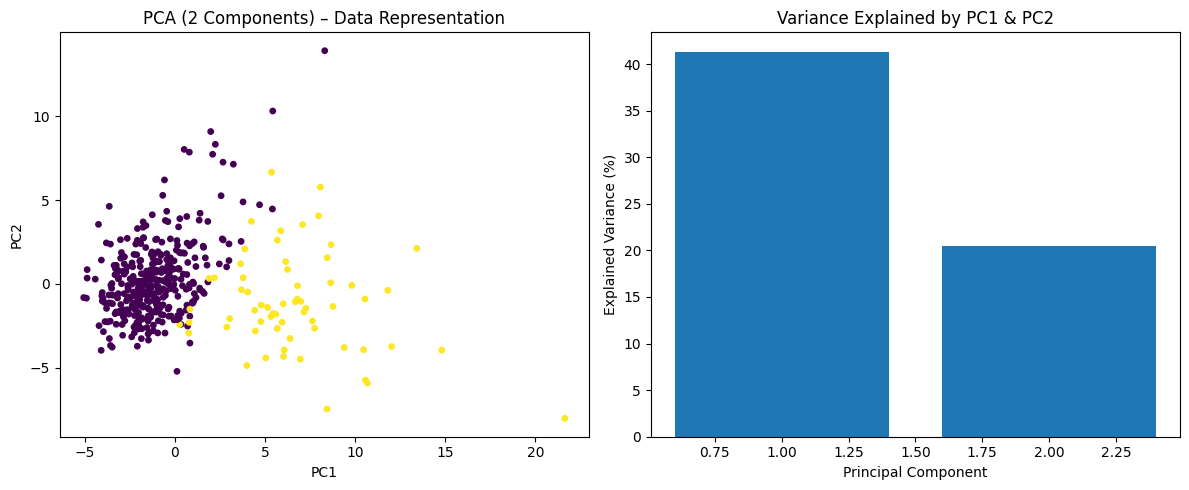

In [38]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# features and labels
X = df.drop(columns=['id', 'diagnosis'])
y = df['diagnosis'].map({'M': 1, 'B': 0})

# scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA = 2
pca = PCA(n_components=2)
X_pca_2 = pca.fit_transform(X_scaled)

# plot
plt.figure(figsize=(12, 5))

# PCA scatter
plt.subplot(1, 2, 1)
plt.scatter(X_pca_2[:, 0], X_pca_2[:, 1], c=y, s=15)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA (2 Components) – Data Representation")

# explained variance bar
plt.subplot(1, 2, 2)
plt.bar([1, 2], pca.explained_variance_ratio_ * 100)
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance (%)")
plt.title("Variance Explained by PC1 & PC2")

plt.tight_layout()
plt.show()

In [39]:
from sklearn.svm import SVC

linear_svc = SVC(kernel='linear', C=1.0)
poly_svc   = SVC(kernel='poly', degree=3, gamma='scale', C=1.0)
rbf_svc    = SVC(kernel='rbf', gamma='scale', C=1.0)

linear_svc.fit(X_train_pca, y_train)
poly_svc.fit(X_train_pca, y_train)
rbf_svc.fit(X_train_pca, y_train)


,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [40]:
import numpy as np
import matplotlib.pyplot as plt

def plot_boundary(ax, model, X, y, title):
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.2)
    ax.scatter(X[:,0], X[:,1], c=y, s=15)
    ax.set_title(title)
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")


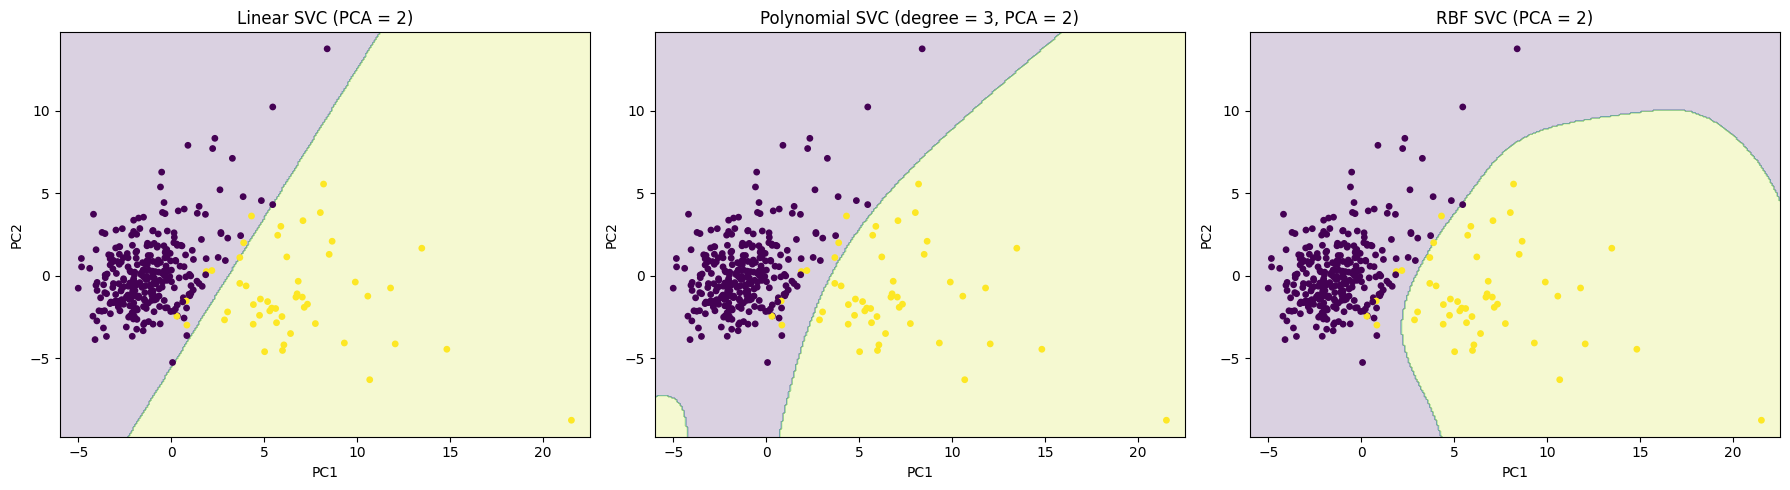

In [41]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

plot_boundary(
    axes[0],
    linear_svc,
    X_train_pca,
    y_train,
    "Linear SVC (PCA = 2)"
)

plot_boundary(
    axes[1],
    poly_svc,
    X_train_pca,
    y_train,
    "Polynomial SVC (degree = 3, PCA = 2)"
)

plot_boundary(
    axes[2],
    rbf_svc,
    X_train_pca,
    y_train,
    "RBF SVC (PCA = 2)"
)

plt.tight_layout()
plt.show()

In [42]:
from sklearn.svm import SVC

linear_svc = SVC(kernel='linear', C=1.0)
poly_svc   = SVC(kernel='poly', degree=3, gamma='scale', C=1.0)
rbf_svc    = SVC(kernel='rbf', gamma='scale', C=1.0)

linear_svc.fit(X_train_pca, y_train)
poly_svc.fit(X_train_pca, y_train)
rbf_svc.fit(X_train_pca, y_train)


,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [43]:
models = {
    "Linear SVC": linear_svc,
    "Polynomial SVC": poly_svc,
    "RBF SVC": rbf_svc
}

for name, model in models.items():
    print(f"\n{name}")
    print("Support vectors per class:", model.n_support_)
    print("Total support vectors:", model.n_support_.sum())


Linear SVC
Support vectors per class: [10 11]
Total support vectors: 21

Polynomial SVC
Support vectors per class: [15 13]
Total support vectors: 28

RBF SVC
Support vectors per class: [21 20]
Total support vectors: 41


In [44]:
n_train = X_train_pca.shape[0]

for name, model in models.items():
    pct = model.n_support_.sum() / n_train * 100
    print(f"{name}: {pct:.2f}% of training samples are support vectors")


Linear SVC: 6.25% of training samples are support vectors
Polynomial SVC: 8.33% of training samples are support vectors
RBF SVC: 12.20% of training samples are support vectors


In [45]:
## Get the summary of support vectors across 3 variants with and without PCA

#Step 1: Common imports

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [46]:
# Step 2: Prepare data (split once, reused)

X = df.drop(columns=['id', 'diagnosis'])
y = df['diagnosis'].map({'M': 1, 'B': 0})

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


In [47]:
#  Step 3: Helper to train models and collect SV stats

def get_sv_stats(X_train_rep, y_train):
    models = {
        "Linear SVC": SVC(kernel='linear', C=1.0),
        "Polynomial SVC": SVC(kernel='poly', degree=3, gamma='scale', C=1.0),
        "RBF SVC": SVC(kernel='rbf', gamma='scale', C=1.0)
    }

    stats = {}
    n_train = X_train_rep.shape[0]

    for name, model in models.items():
        model.fit(X_train_rep, y_train)
        sv_count = model.n_support_.sum()
        sv_pct = sv_count / n_train * 100
        stats[name] = f"{sv_count} ({sv_pct:.1f}%)"

    return stats


In [48]:
# Step 4: Collect stats for without PCA

stats_no_pca = get_sv_stats(X_train_scaled, y_train)

In [49]:
# Step 5: Collect stats for with PCA = 8

pca = PCA(n_components=8)
X_train_pca8 = pca.fit_transform(X_train_scaled)

stats_pca8 = get_sv_stats(X_train_pca8, y_train)

In [50]:
#Step 6: Final comparison table

sv_table = pd.DataFrame(
    [stats_no_pca, stats_pca8],
    index=["Without PCA", "With PCA = 8"]
)

print(sv_table)

             Linear SVC Polynomial SVC     RBF SVC
Without PCA   16 (4.8%)     39 (11.6%)  65 (19.3%)
With PCA = 8  13 (3.9%)     34 (10.1%)  60 (17.9%)


In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Features and labels
X = df.drop(columns=['id', 'diagnosis'])
y = df['diagnosis'].map({'M': 1, 'B': 0})

split_ratios = [0.4, 0.3, 0.2, 0.1]  # test sizes
results = []

for test_size in split_ratios:

    # Split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=test_size,
        random_state=42,
        stratify=y
    )

    # Scale
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # PCA = 8
    pca = PCA(n_components=8)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Linear SVC
    model = SVC(kernel='linear', C=1.0)
    model.fit(X_train_pca, y_train)

    y_pred = model.predict(X_test_pca)

    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    FN = cm[1, 0]
    FP = cm[0, 1]

    sv_count = model.n_support_.sum()
    sv_pct = sv_count / X_train_pca.shape[0] * 100

    results.append([
        f"{int((1-test_size)*100)}:{int(test_size*100)}",
        acc,
        FN,
        FP,
        sv_count,
        round(sv_pct, 2)
    ])

# Create summary table
results_df = pd.DataFrame(
    results,
    columns=[
        "Split (Train:Test)",
        "Accuracy",
        "False Negatives",
        "False Positives",
        "Support Vectors",
        "SV %"
    ]
)

print(results_df)

  Split (Train:Test)  Accuracy  False Negatives  False Positives  \
0              60:40  0.994048                1                0   
1              70:30  0.984127                2                0   
2              80:20  0.988095                1                0   
3              90:10  1.000000                0                0   

   Support Vectors  SV %  
0               11  4.37  
1               11  3.74  
2               13  3.87  
3               14  3.70  


In [46]:
from sklearn.metrics import accuracy_score

split_ratios = [0.4, 0.3, 0.2, 0.1]
results = []

for test_size in split_ratios:

    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=test_size,
        random_state=42,
        stratify=y
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    pca = PCA(n_components=8)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    model = SVC(kernel='linear', C=1.0)
    model.fit(X_train_pca, y_train)

    # Training accuracy
    train_acc = accuracy_score(y_train, model.predict(X_train_pca))

    # Test accuracy
    test_acc = accuracy_score(y_test, model.predict(X_test_pca))

    results.append([
        f"{int((1-test_size)*100)}:{int(test_size*100)}",
        round(train_acc, 4),
        round(test_acc, 4),
        round(train_acc - test_acc, 4)
    ])

results_df = pd.DataFrame(
    results,
    columns=["Split", "Train Accuracy", "Test Accuracy", "Gap"]
)

print(results_df)

   Split  Train Accuracy  Test Accuracy     Gap
0  60:40          0.8592         0.8596 -0.0004
1  70:30          0.8518         0.8596 -0.0079
2  80:20          0.8440         0.8947 -0.0508
3  90:10          0.8535         0.8772 -0.0237
